# Imports

In [5]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import models, layers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import activations
from tensorflow.keras.regularizers import l2
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.backend import expand_dims
import matplotlib.pyplot as plt
import os
import matplotlib.image as mpimg
from tensorflow.python.lib.io import file_io
from io import BytesIO
import pandas as pd
from PIL import Image

# Load Model

In [3]:
!pwd

/home/brunop/code/pratesbruno/emotion-ai-tfjs/notebooks


In [11]:
path = '../saved_models/7813-bruno'

In [12]:
model = models.load_model(path)

In [14]:
happy_bruno4 = Image.open('../test_pics/happy_bruno4.jpg')

In [15]:
def predict(model, array):
    prediction_array = model.predict(array)
    label_max = int(np.argmax(prediction_array))
    labels = ['sad', 'happy', 'surprise', 'neutral']
    return prediction_array, labels[label_max]
    
    
def reshape_and_predict(model, img):
    rezised_img = img.resize((48, 48))
    grayscale_img = rezised_img.convert('L')
    img_array = np.array(grayscale_img)
    final_array = (img_array/255).reshape((1,48,48,1))
    
    plt.imshow(img)
    return predict(model, final_array)

(array([[9.1285088e-05, 9.9915648e-01, 1.8484385e-05, 7.3386123e-04]],
       dtype=float32),
 'happy')

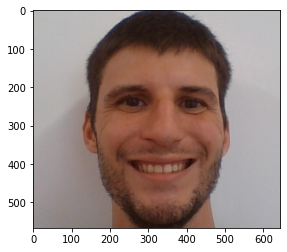

In [28]:
reshape_and_predict(model,happy_bruno4)

In [29]:
def reshape_img(img):
    rezised_img = img.resize((48, 48))
    grayscale_img = rezised_img.convert('L')
    img_array = np.array(grayscale_img)
    final_array = (img_array/255).reshape((1,48,48,1))
    return final_array

In [31]:
img_as_array = reshape_img(happy_bruno4)

In [36]:
img_as_tensor = tf.convert_to_tensor(img_as_array, np.float32)
type(img_as_tensor)

tensorflow.python.framework.ops.EagerTensor

In [ ]:
img_as_tensor

In [35]:
predict(model, img_as_tensor)

(array([[9.1285088e-05, 9.9915648e-01, 1.8484385e-05, 7.3386123e-04]],
       dtype=float32),
 'happy')

# Convert to Tensorflow.js

In [25]:
!pip install tensorflowjs

     |████████████████████████████████| 63 kB 849 kB/s eta 0:00:01
     |████████████████████████████████| 103 kB 11.1 MB/s eta 0:00:01
  Using cached six-1.15.0-py2.py3-none-any.whl (10 kB)
  Using cached numpy-1.19.5-cp38-cp38-manylinux2010_x86_64.whl (14.9 MB)
  Attempting uninstall: six
    Found existing installation: six 1.14.0
    Uninstalling six-1.14.0:
      Successfully uninstalled six-1.14.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.18.5
    Uninstalling numpy-1.18.5:
      Successfully uninstalled numpy-1.18.5


In [26]:
import tensorflowjs as tfjs

In [17]:
def transform_model_to_tfjs(path_to_model,tfjs_target_dir):
    model = models.load_model(path_to_model)
    tfjs.converters.save_keras_model(model, tfjs_target_dir)
    print('model transformed successfully to tfjs')

In [18]:
target_dir = '../saved_models/tfjs'

In [27]:
transform_model_to_tfjs(path, target_dir)

model transformed successfully to tfjs


/home/brunop/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/tensorflowjs/converters/keras_h5_conversion.py:123: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  return h5py.File(h5file)
